In [2]:
# all imports
import numpy as np
import os
import requests
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.wcs import WCS
import math
import matplotlib as mpl
from astropy.visualization.wcsaxes import SphericalCircle
import pandas as pd
import random
from matplotlib.patches import Ellipse
import ligo.skymap.plot

In [3]:
# define directories
data_dir = '/global/cfs/projectdirs/desi/science/td/pv/tfgalaxies/'
cache_dir = '/pscratch/sd/j/jjpim/cache/' # my cache path
vi_dir = '/pscratch/sd/j/jjpim/visual_inspection/' # vi image path
v_dir = '/pscratch/sd/j/jjpim/2Dvmap/' # 2D velocity map image path

In [4]:
# load updated fuji table
tf_fuji = Table.read(data_dir + 'SV/desi_pv_tf_fuji_healpix_rotcurve_EOA_VI_velocity.fits') 
# load iron table
tf_iron = Table.read(data_dir + 'Y1/desi_pv_tf_iron_healpix_rotcurve_EOA_VI_velocity.fits')
#combine
tf_mastertable = vstack([tf_fuji,tf_iron])
#unique SGA IDs in rot curve galaxies
tf_galaxies = np.unique(tf_mastertable['SGA_ID'][tf_mastertable['ROT_CURVE']==1])
tf_mastertable_dict = {}
for sga_id in np.unique(tf_mastertable['SGA_ID'][tf_mastertable['ROT_CURVE']==1]):
    tf_mastertable_dict[sga_id] = np.where(tf_mastertable['SGA_ID'] == sga_id)[0]
tf_mastertable[:5]

TARGETID,TARGET_RA,TARGET_DEC,HEALPIX,SURVEY,Z,ZERR,ZWARN,DELTACHI2,FILENAME,PVTYPE,SGA_ID,RA,DEC,OBS_IN_SV,SKY_FIBER_DIST,SKY_FIBER_DIST_R26,ROT_CURVE,EOA,VELOCITY,VERR,Z_CENTER
int64,float64,float64,int64,bytes4,float64,float64,int64,float64,bytes65,bytes3,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1079550234591232,194.390863195343,27.5157211790145,10378,sv3,1.1235686466514,7.31685779475115e-05,4,3.28414569795132,fuji/healpix/sv3/bright/103/10378/redrock-sv3-bright-10378.fits,EXT,662902,194.39086319534337,27.51572117901454,1.0,0.03927420444753712,1.0000000170652443,0.0,0.0,--,inf,--
1092744374124544,194.390863195343,27.5157211790145,10378,sv3,0.686773088332363,6.9756676262104e-05,4,0.786607094109058,fuji/healpix/sv3/dark/103/10378/redrock-sv3-dark-10378.fits,EXT,662902,194.39086319534337,27.51572117901454,1.0,0.03927420444753712,1.0000000170652443,0.0,0.0,--,inf,--
1092744374124546,194.364461113654,27.5037185881314,10378,sv3,0.0242933923052181,4.95233472646785e-05,0,95.428411073226,fuji/healpix/sv3/dark/103/10378/redrock-sv3-dark-10378.fits,EXT,662902,194.36446111365385,27.50371858813136,1.0,0.012960487467698754,0.3300000056318236,0.0,0.0,--,inf,--
1092744369930240,194.338458724402,27.4918902690326,10378,sv3,0.0264170223697961,0.00010139452689994,0,9.53278421035066,fuji/healpix/sv3/dark/103/10378/redrock-sv3-dark-10378.fits,EXT,662902,194.33845872440244,27.491890269032595,1.0,0.012960487467685656,0.33000000563149007,0.0,0.0,--,inf,--
1092744374124545,194.377858465028,27.5098100780282,10378,sv3,0.211332646769145,6.68535116703737e-05,4,3.73989077657461,fuji/healpix/sv3/dark/103/10378/redrock-sv3-dark-10378.fits,EXT,662902,194.3778584650283,27.509810078028195,1.0,0.026313716979861984,0.6700000114340222,0.0,0.0,--,inf,--


In [5]:
# load SGA table
SGA = Table.read('/global/cfs/cdirs/cosmo/data/sga/2020/SGA-2020.fits', 'ELLIPSE')
SGA_dict = {}
for i in range(len(SGA)):
    SGA_dict[SGA['SGA_ID'][i]] = i
SGA[:5]

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32
2,SGA-2020 2,PGC1283207,1283207,228.3770865,5.4232017,S?,152.2,0.36307806,0.724436,0.03463229,23.40448,16.976,False,LEDA-20181114,0,PGC1283207,1,True,228.3770865,5.4232017,0.36307806,2283p055,228.3770803831908,5.423191398593787,0.49470574,SB26,158.20142,0.545691,228.37700918822188,5.4232652570544015,10.897086,3.3509698,3.1147978,3.240862,5.902337,6.9126143,7.941369,8.997992,10.073601,11.199986,12.391357,13.561038,14.841172,16.966799,16.108246,15.486356,16.879545,16.024958,15.400715,16.818878,15.967034,15.341793,16.776297,15.925804,15.300776,16.746685,15.897334,15.272053,16.725166,15.876816,15.2521105,16.708357,15.862035,15.237181,16.696539,15.851936,15.226998,16.689613,15.844313,15.21976,0.013392451,0.02354,0.021872982,0.01736985,0.024445537,0.039866067,0.05026544,0.08455789,0.122911856,0.005682776,0.0054258136,0.0049038026,0.005588406,0.005323561,0.0047632363,0.00543534,0.005177031,0.0046343105,0.0053025587,0.005040888,0.0045181247,0.005206092,0.0049438984,0.0044374703,0.0051483097,0.0048758644,0.0043834248,0.0051032505,0.0048264163,0.004344248,0.0050705094,0.004792021,0.004319857,0.005054293,0.004765629,0.0043044444,16.65942,0.34037337,0.2978292,3.0239506,0.07928849,15.820566,0.2640441,0.34559453,3.3033552,0.003811298,15.195567,0.29826432,0.3001073,3.2333765,0.011723555,0
3,SGA-2020 3,PGC1310416,1310416,202.54443750000002,6.9345944,Sc,159.26,0.4017908,0.7816278,0.073888786,23.498482,16.85,False,LEDA-20181114,1,PGC1310416,1,True,202.54443750000002,6.9345944,0.4017908,

In [23]:
SGA[SGA_dict[1361363]]

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32
1361363,SGA-2020 1361363,NGC1055,10208,40.4383785,0.4434215,SBb,103.86,6.9183106,0.510505,0.003313292,24.241482,11.413,False,LEDA-20181114,42715,NGC1055_GROUP,2,True,40.43589519537581,0.44049473699344993,7.1486073,0403p005,40.43830987118589,0.442017439143068,12.1215,SB26,99.6077,0.4941314,40.438457349884956,0.4419244264738446,241.92447,131.05379,118.62528,103.69651,87.716606,112.821625,140.56438,174.96185,212.30971,249.47435,292.3909,329.82507,363.645,11.784812,10.935244,10.263386,11.526161,10.70718,10.06317,11.3469,10.536031,9.906813,11.199166,10.400616,9.787445,11.0931225,10.299376,9.694135,11.008543,10.217968,9.621243,10.93865,10.15326,9.567887,10.904092,10.1211,9.538494,10.87996,10.097615,9.516363,0.24380153,0.31164825,0.2615483,0.36839452,0.33322743,0.41993904,0.31198525,0.6100892,0.57713705,0.0017113079,0.0019710946,0.0023350976,0.0014562863,0.0016769064,0.00199945,0.001288231,0.0014784539,0.0017696426,0.0011590625,0.0013311099,0.001604349,0.0010671706,0.0012254253,0.0014830095,0.0009966226,0.0011443867,0.0013926182,0.0009416153,0.0010834476,0.0013293464,0.00091454067,0.001053429,0.0012952683,0.0008961318,0.001032019,0.001270213,10.650348,1.4930083,21.956308,1.3647391,152.187,9.91599,0.8150585,85.564064,1.6301877,96.176926,9.374666,0.6094568,160.37228,1.7899163,39.384125,0


In [ ]:
#find sga id with certain amount of targets
for sga_id in tf_galaxies:
    if len(tf_mastertable[tf_mastertable['SGA_ID']==  sga_id])>10 and len(tf_mastertable[tf_mastertable['SGA_ID']==  sga_id])<12:
        print(sga_id)

In [6]:
tf_mastertable[tf_mastertable['SGA_ID']==  1583]

TARGETID,TARGET_RA,TARGET_DEC,HEALPIX,SURVEY,Z,ZERR,ZWARN,DELTACHI2,FILENAME,PVTYPE,SGA_ID,RA,DEC,OBS_IN_SV,SKY_FIBER_DIST,SKY_FIBER_DIST_R26,ROT_CURVE,EOA,VELOCITY,VERR,Z_CENTER
int64,float64,float64,int64,bytes4,float64,float64,int64,float64,bytes65,bytes3,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1071077795037187,236.813448650733,43.9957553864163,9923,sv3,0.0352887795291414,7.31620291911626e-06,0,550.152345106006,fuji/healpix/sv3/bright/99/9923/redrock-sv3-bright-9923.fits,TFT,1583,236.8134486507333,43.99575538641631,1.0,0.0012179991251851686,0.3300000066379492,1.0,0.0,-54.429628559346824,2.5613154243510903,0.0354703372271651
1084271934570499,236.813448650733,43.9957553864163,9923,sv3,0.0353008322684175,9.4825361822116e-06,0,335.291149647906,fuji/healpix/sv3/dark/99/9923/redrock-sv3-dark-9923.fits,TFT,1583,236.8134486507333,43.99575538641631,1.0,0.0012179991251851686,0.3300000066379492,1.0,0.0,-50.81630822613043,3.1354515858625356,0.0354703372271651
1071077795037188,236.815120686376,43.9961131019287,9923,sv3,1.51232579748677,0.000144175642625962,4,0.879315532743931,fuji/healpix/sv3/bright/99/9923/redrock-sv3-bright-9923.fits,TFT,1583,236.81512068637608,43.99611310192875,1.0,0.0024729073147839588,0.6700000134808607,1.0,0.0,442750.1285419483,43.243004715416255,0.0354703372271651
1071077795037186,236.810202992035,43.9950609278788,9923,sv3,0.0356212945166845,2.64003527378348e-05,0,36.7676933435723,fuji/healpix/sv3/bright/99/9923/redrock-sv3-bright-9923.fits,TFT,1583,236.81020299203462,43.99506092787884,1.0,0.0012179991251745326,0.33000000663506757,1.0,0.0,45.25585687803907,8.024394083816402,0.0354703372271651
39633149604397504,236.811825811888,43.9954081686317,9923,sv3,0.0354706088249934,6.27417750722545e-06,0,869.667408287525,fuji/healpix/sv3/bright/99/9923/redrock-sv3-bright-9923.fits,TFT,1583,236.81182581188813,43.995408168631656,1.0,2.0446449006493366e-14,5.539682392497224e-12,1.0,0.0,0.08142298053466618,2.299470069564625,0.0354703372271651
1071077795037189,236.816743563778,43.9964602730794,9923,sv3,0.637227019154047,7.5017431284708e-05,4,3.39603114128113,fuji/healpix/sv3/bright/99/9923/redrock-sv3-bright-9923.fits,TFT,1583,236.8167435637778,43.996460273079435,1.0,0.0036909064400197245,1.0000000201325185,1.0,0.0,180402.1147927841,22.52852409238908,0.0354703372271651
1071077795037186,236.810202992035,43.9950609278788,9923,sv3,0.035624773583201,2.34046373515135e-05,0,42.721979781054,iron/healpix/sv3/bright/99/9923/redrock-sv3-bright-9923.fits,TFT,1583,236.80985875996186,43.99498726779676,1.0,0.0014763625759723403,0.40000000804337577,1.0,0.0,46.298854780566494,7.140121258098336,0.0354703372271651
39633149604397504,236.811825811888,43.9954081686317,9923,sv3,0.0354700656293368,6.20573323325631e-06,0,888.425094611943,iron/healpix/sv3/bright/99/9923/redrock-sv3-bright-9923.fits,TFT,1583,236.81182581188813,43.995408168631656,1.0,2.0446449006493366e-14,5.539682392497224e-12,1.0,0.0,-0.08142298053258595,2.2827161172791213,0.0354703372271651
1071077795037187,236.813448650733,43.9957553864163,9923,sv3,0.0352891736835534,7.28227101610471e-06,0,503.728564623743,iron/healpix/sv3/bright/99/9923/redrock-sv3-bright-9923.fits,TFT,1583,236.81379289171772,43.99582903572088,1.0,0.0014763625760060033,0.4000000080524963,1.0,0.0,-54.31146403934036,2.552609744082793,0.0354703372271651


In [ ]:
'''
#attempt to automate VI process
sga_id = 9769
targetid = 1071077795037187
galaxy = tf_mastertable[tf_mastertable['SGA_ID'] == sga_id]
galaxy_targets = galaxy[['TARGETID']!= targetid]
target = tf_mastertable[tf_mastertable['TARGETID'] == targetid]
tr = target['SKY_FIBER_DIST_R26']
r = galaxy_targets['SKY_FIBER_DIST_R26']
#gives error because two diff size arrays:
delta_r = np.subtract(tr-r)

good_targs = []

for targetid in galaxy:
    if delta_r >= 0.13:
        good_targs.append()

#add to end of loop? or flag and put at start of loop so it's faster because won't need to plot all bad ones too?
if len(good_targs) >= 3:
img_name = v_dir + '{}.jpg'.format(sga_id)
plt.savefig(v_dir + '{}.png'.format(sga_id), dpi=120)
'''

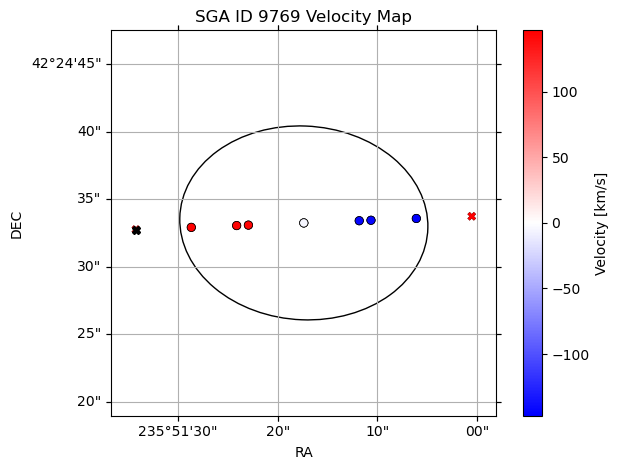

In [6]:
#code to plot for one galaxy at a time
plt.close('all')
sga_id = 9769
galaxy = tf_mastertable[tf_mastertable['SGA_ID'] == sga_id]
c = galaxy['VELOCITY']

# find max of absolute value of the leftover velocities
velocity_abs = np.abs(c)
v_max = np.max(velocity_abs)

# separate the data into velocity types
high_velocity = galaxy[np.abs(c) > 1000]
low_velocity = galaxy[np.abs(c) <= 1000]

if len(low_velocity) > 0:
    first_low_velocity = low_velocity['VELOCITY'][0]
    vmin = -np.abs(first_low_velocity)
    vmax = np.abs(first_low_velocity)    
else:
    # if there are no low velocity data points set range as -1000 to 1000
    vmin = -1000 if v_max > 1000 else -v_max
    vmax = 1000 if v_max > 1000 else v_max
    
    
#ellipse center and position angle (degrees)
x_center = SGA['RA'][SGA_dict[sga_id]]
y_center = SGA['DEC'][SGA_dict[sga_id]]
theta = SGA['PA'][SGA_dict[sga_id]]

#put major and minor axis into degrees
maj = SGA['D26'][SGA_dict[sga_id]]
major = maj/60
ratio = SGA['BA'][SGA_dict[sga_id]]
min_axis = maj*ratio
minor = major*ratio

#set up to plot w/transform
ellipse_center = SkyCoord(ra = x_center * u.degree, dec = y_center * u.degree)
major_radius = np.arctan(major*0.01) * u.radian

fig = plt.figure(tight_layout=True)

ax_sky = plt.subplot(111, projection='astro degrees zoom', center=ellipse_center, radius=major_radius)
ax_sky.grid()

abc = ax_sky.scatter(high_velocity['RA'], 
               high_velocity['DEC'], 
               c=high_velocity['VELOCITY'], 
               marker='X', 
               cmap='bwr', 
               linewidths=0.1, 
               edgecolors='black', 
               vmin = vmin, 
               vmax = vmax,
               transform=ax_sky.get_transform('world'))
    
bcd = ax_sky.scatter(low_velocity['RA'], 
               low_velocity['DEC'], 
               c=low_velocity['VELOCITY'], 
               marker='o', 
               cmap='bwr', 
               linewidths=0.5, 
               edgecolors='black', 
               vmin=vmin, 
               vmax = vmax,
               transform=ax_sky.get_transform('world'))

# plot w/ color bar
fig.colorbar(bcd, label='Velocity [km/s]', ax=ax_sky)
ax_sky.set_xlabel('RA')
ax_sky.set_ylabel('DEC')
ax_sky.set_title('SGA ID {} Velocity Map'.format(galaxy['SGA_ID'][0]))

vertex1 = ellipse_center.directional_offset_by(theta*u.deg, 0.5*maj*u.arcmin)
ax_sky.plot(vertex1.ra, vertex1.dec, 'kX',  transform=ax_sky.get_transform('world'))
# ax_sky.plot(ellipse_center.ra, ellipse_center.dec, 'gX',  transform=ax_sky.get_transform('world'))
# ax_sky.plot(x_center, y_center, 'mX',  transform=ax_sky.get_transform('world'))

phi = np.arctan((vertex1.ra - ellipse_center.ra)/(vertex1.dec - ellipse_center.dec)).to('deg')
# phi = np.arctan2((vertex1.dec - ellipse_center.dec),(vertex1.ra - ellipse_center.ra)).to('deg')

# plotting ellipse
ell = Ellipse(
    xy = (x_center, y_center),
    width = minor,
    height = major,
    angle = (phi.value),
    edgecolor = 'black',
    facecolor = 'none',
    transform=ax_sky.get_transform('world')
    )
ax_sky.add_artist(ell)

img_name = v_dir + '{}.jpg'.format(sga_id)
plt.savefig(v_dir + '{}.png'.format(sga_id), dpi=120)

plt.show()

In [ ]:
#code with loop to run through all galaxies in list, saves image
for sga_id in tf_galaxies:
    galaxy = tf_mastertable[tf_mastertable['SGA_ID'] == sga_id]
    c = galaxy['VELOCITY']

    # find max of absolute value of the leftover velocities
    velocity_abs = np.abs(c)
    v_max = np.max(velocity_abs)

    # separate the data into velocity types
    high_velocity = galaxy[np.abs(c) > 1000]
    low_velocity = galaxy[np.abs(c) <= 1000]

    if len(low_velocity) > 0:
        first_low_velocity = low_velocity['VELOCITY'][0]
        vmin = -np.abs(first_low_velocity)
        vmax = np.abs(first_low_velocity)    
    else:
        # if there are no low velocity data points set range as -1000 to 1000
        vmin = -1000 if v_max > 1000 else -v_max
        vmax = 1000 if v_max > 1000 else v_max
    
    
    #ellipse center and position angle (degrees)
    x_center = SGA['RA'][SGA_dict[sga_id]]
    y_center = SGA['DEC'][SGA_dict[sga_id]]
    theta = SGA['PA'][SGA_dict[sga_id]]

    #put major and minor axis into degrees
    maj = SGA['D26'][SGA_dict[sga_id]]
    major = maj/60
    ratio = SGA['BA'][SGA_dict[sga_id]]
    min_axis = maj*ratio
    minor = major*ratio

    #set up to plot w/transform
    ellipse_center = SkyCoord(ra = x_center * u.degree, dec = y_center * u.degree)
    major_radius = np.arctan(major*0.01) * u.radian

    fig = plt.figure(tight_layout=True)

    ax_sky = plt.subplot(111, projection='astro degrees zoom', center=ellipse_center, radius=major_radius)

    abc = ax_sky.scatter(high_velocity['RA'], 
               high_velocity['DEC'], 
               c=high_velocity['VELOCITY'], 
               marker='X', 
               cmap='bwr', 
               linewidths=0.1, 
               edgecolors='black', 
               vmin = vmin, 
               vmax = vmax,
               transform=ax_sky.get_transform('world'))
    
    bcd = ax_sky.scatter(low_velocity['RA'], 
               low_velocity['DEC'], 
               c=low_velocity['VELOCITY'], 
               marker='o', 
               cmap='bwr', 
               linewidths=0.5, 
               edgecolors='black', 
               vmin=vmin, 
               vmax = vmax,
               transform=ax_sky.get_transform('world'))

    # plot w/ color bar
    fig.colorbar(bcd, label='Velocity [km/s]', ax=ax_sky)
    ax_sky.set_xlabel('RA')
    ax_sky.set_ylabel('DEC')
    ax_sky.set_title('SGA ID {} Velocity Map'.format(galaxy['SGA_ID'][0]))

    vertex1 = ellipse_center.directional_offset_by(theta*u.deg, 0.5*maj*u.arcmin)

    phi = np.arctan((vertex1.ra - ellipse_center.ra)/(vertex1.dec - ellipse_center.dec)).to('deg')

    # plotting ellipse
    ell = Ellipse(
        xy = (x_center, y_center),
        width = minor,
        height = major,
        angle = (180 - phi.value),
        edgecolor = 'black',
        facecolor = 'none',
        transform=ax_sky.get_transform('world')
        )
    ax_sky.add_artist(ell)
    img_name = v_dir + '{}.jpg'.format(sga_id)
    plt.savefig(v_dir + '{}.png'.format(sga_id), dpi=120)
    '''if os.path.exists(img_name):
        if verbose:
            print('{} exists.'.format(img_name))
    else:
        plt.savefig(v_dir + '{}.png'.format(sga_id), dpi=120)
    '''
    plt.show()

In [7]:
#check values
print(180-phi.value)
print(phi.value)
print(vertex1)
print(theta)
print(180 - theta)

268.32660048395553
-88.3266004839555
<SkyCoord (ICRS): (ra, dec) in deg
    (235.85950445, 42.40909684)>
92.2643
87.73570251464844


In [10]:
print(ell.get_vertices())
print(high_velocity[['RA','DEC']])
print(ell.get_angle())

[(235.85828195374785, 42.40933439559529), (235.85137310561834, 42.4091325560946)]
        RA                DEC        
------------------ ------------------
235.85015058419148  42.40936992051869
235.85015058419148  42.40936992051869
235.85950445481367 42.409096841066976
235.85950445481367 42.409096841066976
-88.3266004839555


In [22]:
vertex1 = ellipse_center.directional_offset_by(theta*u.deg, 0.5*maj*u.arcmin)
vertex2 = ellipse_center.directional_offset_by(theta*u.deg + 180*u.deg, 0.5*maj*u.arcmin)
print(vertex1, vertex2)

<SkyCoord (ICRS): (ra, dec) in deg
    (215.88533457, 52.92176436)> <SkyCoord (ICRS): (ra, dec) in deg
    (215.87555098, 52.92488161)>


In [23]:
[(vertex1.ra.value, vertex1.dec.value), (vertex2.ra.value, vertex2.dec.value)]

[(215.8853345746458, 52.92176435734562),
 (215.87555098410664, 52.92488160518876)]

In [25]:
phi = np.arctan((vertex1.ra - ellipse_center.ra)/(vertex1.dec - ellipse_center.dec)).to('deg')
phi.value

-72.32541484092191

In [ ]:
#attempt to fix bad ellipse plots
'''
for sga_id in tf_galaxies:
    galaxy = tf_mastertable[tf_mastertable['SGA_ID'] == sga_id]
    c = galaxy['VELOCITY']

    # find max of absolute value of the leftover velocities
    velocity_abs = np.abs(c)
    v_max = np.max(velocity_abs)

    # separate the data into velocity types
    high_velocity = galaxy[np.abs(c) > 1000]
    low_velocity = galaxy[np.abs(c) <= 1000]

    if len(low_velocity) > 0:
        first_low_velocity = low_velocity['VELOCITY'][0]
        vmin = -np.abs(first_low_velocity)
        vmax = np.abs(first_low_velocity)    
    else:
        # if there are no low velocity data points set range as -1000 to 1000
        vmin = -1000 if v_max > 1000 else -v_max
        vmax = 1000 if v_max > 1000 else v_max
    
    
    #ellipse center and position angle (degrees)
    x_center = SGA['RA'][SGA_dict[sga_id]]
    y_center = SGA['DEC'][SGA_dict[sga_id]]
    theta = SGA['PA'][SGA_dict[sga_id]]

    #put major and minor axis into degrees
    maj = SGA['D26'][SGA_dict[sga_id]]
    major = maj/60
    ratio = SGA['BA'][SGA_dict[sga_id]]
    min_axis = maj*ratio
    minor = major*ratio

    #set up to plot w/transform
    ellipse_center = SkyCoord(ra=x_center * u.degree, dec=y_center * u.degree)
    major_radius = np.arctan(major*0.01) * u.radian

    fig = plt.figure(tight_layout=True)

    ax_sky = plt.subplot(111, projection='astro degrees zoom', center=ellipse_center, radius=major_radius)
    #ax_sky.grid

    abc = ax_sky.scatter(high_velocity['RA'], 
               high_velocity['DEC'], 
               c=high_velocity['VELOCITY'], 
               marker='X', 
               cmap='bwr', 
               linewidths=0.1, 
               edgecolors='black', 
               vmin = vmin, 
               vmax = vmax,
               transform=ax_sky.get_transform('world'))
    
    bcd = ax_sky.scatter(low_velocity['RA'], 
               low_velocity['DEC'], 
               c=low_velocity['VELOCITY'], 
               marker='o', 
               cmap='bwr', 
               linewidths=0.5, 
               edgecolors='black', 
               vmin=vmin, 
               vmax = vmax,
               transform=ax_sky.get_transform('world'))

    # plot w/ color bar
    fig.colorbar(bcd, label='Velocity [km/s]', ax=ax_sky)
    ax_sky.set_xlabel('RA')
    ax_sky.set_ylabel('DEC')
    ax_sky.set_title('SGA ID {} Velocity Map'.format(galaxy['SGA_ID'][0]))

    vertex1 = ellipse_center.directional_offset_by(theta*u.deg, 0.5*maj*u.arcmin)
    #vertex2 = ellipse_center.directional_offset_by(theta*u.deg + 180*u.deg, 0.5*maj*u.arcmin)

    #vertex3 = ellipse_center.directional_offset_by(theta*u.deg + 90*u.deg, 0.5*min_axis*u.arcmin)
    #vertex4 = ellipse_center.directional_offset_by(theta*u.deg + 270*u.deg, 0.5*min_axis*u.arcmin)

    phi = np.arctan((vertex1.ra - ellipse_center.ra)/(vertex1.dec - ellipse_center.dec)).to('deg')

    # plotting ellipse
    ell = Ellipse(
        xy = (x_center, y_center),
        width = minor,
        height = major,
        #angle =(180 - theta), #accounts for differences between matplotlib and legacy survey units
        angle = 180 - phi.value,
        #vertices = [(vertex1.ra.value, vertex1.dec.value), (vertex2.ra.value, vertex2.dec.value)],
        #co_vertices = [(vertex3.ra.value, vertex3.dec.value), (vertex4.ra.value, vertex4.dec.value)],
        edgecolor = 'black',
        facecolor = 'none',
        transform=ax_sky.get_transform('world')
        )
    ax_sky.add_artist(ell)
    # either load an existing image or save fig to scratch
    img_name = os.path.join(v_dir, '{}.jpg'.format(sga_id))
    plt.savefig(os.path.join(v_dir, '{}.png'.format(sga_id)), dpi=120)
    plt.show()

In [11]:
#all good sga IDs in a list 
good_sga = [9769, 11977, 12892, 14501, 16383, 19235, 19278, 25532, 30149, 31220, 32484, 36904, 37543, 46327, 58617, 73111, 88963, 91660, 90791, 
        106536, 114405, 114489, 122580, 126630, 125611, 128163, 128411, 130766, 149502, 153504, 175220, 176736, 184044, 186239, 189685,
        188525, 190308, 192158, 196470, 199038, 202236, 205028, 209429, 212382, 218773, 235556, 254532, 272164, 272562, 276638, 288715,
        289743, 291766, 300446, 302062, 305831, 309378, 319942, 330678, 349027, 349346, 363344, 373692, 378842, 384420, 389177, 393190,
        395070, 398443, 398532, 416531, 431242, 430161, 432294, 450689, 450566, 455486, 457147, 458798, 462867, 466872, 467582, 471327,
        469868, 471893, 473436, 477805, 481956, 485800, 493017, 507499, 526710, 544419, 544810, 544799, 544943, 548724, 548848, 550458,
        564440, 569298, 568664, 570086, 582248, 591927, 607528, 608015, 629144, 630029, 630390, 635043, 638386, 641578, 643231, 643845,
        644940, 647966, 649753, 649960, 651096, 654469, 659599, 663463, 671301, 671533, 694525, 696291, 696345, 706579, 720480, 722142, 
        726854, 728327, 729726, 729754, 736449, 742167, 743030, 744650, 752683, 757313, 757166, 758123, 759261, 759003, 766672, 783693,
        793633, 804643, 805225, 819754, 820598, 823301, 824225, 826809, 827949, 833961, 833981, 843065, 843126, 845052, 887433, 901663,
        901980, 908818, 908978, 911046, 914975, 914909, 916161, 920806, 923400, 925923, 925354, 928810, 928876, 932984, 947709, 953644,
        957521, 957850, 967351, 968864, 971635, 975775, 972260, 977015, 976853, 979168, 978708, 989040, 989244, 1001302, 1003319, 1008726,
        1014959, 1018187, 1021462, 1026141, 1031898, 1033651, 1033344, 1050173, 1065602, 1073430, 1086934, 1087039, 1087374, 1090772, 1091806,
        1096564, 1098043, 1103477, 1111824, 1117018, 1124386, 1143335, 1146354, 1161160, 1167691, 1171841, 1179377, 1184894, 1184912, 1186034,
        1187240, 1188032, 1188617, 1188926, 1193015, 1191665, 1194588, 1194958, 1199020, 1199539, 1201319, 1203786, 1204237, 1206707, 1218166,
        1219319, 1254154, 1264056, 1264591, 1267967, 1271477, 1271549, 1272700, 1273605, 1278144, 1281619, 1282407, 1285273, 1286710, 1289613,
        1293967, 1301768, 1304908, 1335916, 1338866, 1345100, 1348956, 1349555, 1354266, 1355575, 1361363, 1361399, 1365519, 1365549, 1367137,
        1368018, 1368443, 1374964, 1379143, 1405053, 1429680, 1434487]